# Применение методов машинного обучения при анализе

Для реализации применения алгоритмов машинного обучения при анализе данных об испытаниях образцов необходимо решить две задачи:

1. Произвести преобработку данных полученных при испытании образцов. В виду специфики использовуемого метода, которые будут описаны далее в ходе данной статьи, необходимо осуществить отбор признаков (feature engeneering), изучить корреляцию выбранных признаков, характер распределения значений в полученных выборках. 
2. Спроектировать и обучить предсказательную модель для одного из целевых признаков


По результатам испытаний имеется 50 выходных файлов в формате .txt. Первая цифра в имени файла означает высоту поперечного сечения рабочей области образца. Ширина сечения рабочей области образца одинаковая для всех образцов и равняется 10 мм. Цифра после дефиса означает порядковый номер образца. Для каждого сечения было изготовлено и испытано 10 образцов. 
Для предобработки данных и построения предсказательной модели используется язык программирования (ЯП) python 3.8.10. Преимуществами данного ЯП является его простой синтаксис и адекватное быстродействие для реализуемых задач, а также наличие широкого инструментария подключемых библиотек, облегчающих процесс анализа данных. 

Для начала работы с данными необходимо произвести отбор признаков, а также привести данные в общепринятую форму. Для анализа данных и построения различного рода моделей машинного обучения применяется следующая структура данных: (описание структуры данных: таблицы)

Для начала работы с данными необходимо произвести отбор признаков, а также привести данные в общепринятую форму. Для анализа данных и построения различного рода моделей машинного обучения применяется следующая структура данных: (описание структуры данных: таблицы)

Проведение эксперимента ставило перед собой задачи подтвердить следующие гипотезы: 
1. Максимальная нагрузка, которую способен выдержать образец из печатного пластика статистически значимо зависит от площади поперечного сечения 
2. Возможно установить взаимосвязь и предсказать максимальную нагрузку, которую способен выдержать образец из печатного пластика, основываясь на прочих параметрах

Таким образом для признаков в таблицы были выбраны: максимально достигнутая нагрузка (параметр max_force), перемещение траверсы при данной нагрузке (параметр max_lenght), время, прошедшее от начала процесса растяжения до достижения максимальной нагрузки (параметр max_time), площадь поперечного сечения(параметр section_area), а также бинарный номинативный признак is_valid, который принимает значение True в случае, если образец порвался в рабочей зоне, и значение False в противном случае.   

Для начала работы с данными внутрь среды разработки импортируются необходимые библиотеки для работы с данными: 

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

* Pandas - Программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy
* Nympy - Библиотека с открытым исходным кодом для языка программирования Python, реализующая поддержку многомерных массивов (включая матрицы) и высокоуровневых математических функций, предназначенных для работы с многомерными массивами.
* matplotlib - Библиотека на языке программирования Python для визуализации данных двумерной графикой
* seaborn - Это более высокоуровневое API на базе библиотеки matplotlib.
* os - Базовая библиотека для работы с файлами внутри директорий
* %matplotlib inline - "магический" метод среды разработки Jupiter Notebook. Вызов данного метода предназначен для отрисовки графиков внутри ячеек среды разработки

Для записи признаков необходимо создать таблицу с выбранными столбцами признаков и форматом этих столбцов, что реализуется при помощи библиотеки Pandas. 

In [21]:
experiment_data = pd.DataFrame({
        'max_force':[],
        'max_lenght':[],
        'max_time':[],
        'section_area':pd.Series([], dtype=np.dtype('int32')),
        'is_valid': pd.Series([], dtype=np.dtype('bool_')),
    })

Также создадим переменную whitelist, которая хранит в себе список образцов, которые порвались в рабочей зоне.

In [4]:
whitelist = ['3-2', '3-3', '3-5', '3-9', '3-10', '4-5', '4-6', '4-8', '4-9', '5-6', '5-7', '5-10', '6-1', '6-3', '6-8', '6-9', '7-1', '7-3', '7-7', '7-8', '7-9']

Необходимо просмотреть каждый файл с результатами испытаний. Для решения данной задачи воспользуемся циклом. В результате чтения файла создадим промежуточную таблицу data, в которую будут вноситься результаты испытаний для каждого образца. Затем внутри этой таблицы будет происходить отбор признаков и запись их в исходную таблицу experiment_data. Когда все 50 файлов будут прочитаны и обработаны таблица experiment_data будет сохранена в формате CSV - Comma-Separated Values — текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми.

In [22]:
for file in sorted(os.listdir('Data_samples/')):

    column_names = ['time', 'force', 'lenght']

    data = pd.read_csv(f'Data_samples/{file}', sep='\t', skiprows=17, decimal=',', names = column_names)

    name = file.split('.')[0]
    section_area = int(file[0]) * 10 
    max_force = data.force.max()
    max_lenght = data.loc[data.index[data.force.idxmax()], 'lenght']
    max_time = data.loc[data.index[data.force.idxmax()], 'time']

    if name in whitelist: 
        is_valid = True
    else:
        is_valid = False

    new_value = {
        'max_force': max_force,
        'max_lenght':max_lenght,
        'max_time':max_time,
        'section_area':section_area,
        'is_valid':is_valid
    }

    experiment_data.loc[f'{name}'] = new_value

experiment_data.to_csv('experiment_data.csv')

Убедиться в правильности построения таблицы можно просмотрев первые 5 значений полученной таблицы, воспользовавшись соответствующей командой: 

In [6]:
experiment_data.head(5)

,max_force,max_lenght,max_time,section_area,is_valid
3-1,922.5591,2.064367,123.86,30,False
3-10,871.8252,2.029167,121.75,30,True
3-2,879.5913,1.945533,116.73,30,True
3-3,831.2734,1.874533,112.47,30,True
3-4,810.5214,1.835533,110.13,30,False


Убедиться что все 50 образцов попали в наши данные можно выполнив команду: 
Первое число в скомбках означает число строк в таблице, а второе - число столбцов с признаками

In [7]:
experiment_data.shape

(50, 5)

Для изучения взаимосвязи между признаками можно воспользоваьтся таким статистическим параметром как коэффициент корреляции. характеризует величину отражающую степень взаимосвязи двух переменных между собой. Он может варьировать в пределах от -1 (отрицательная корреляция) до +1 (положительная корреляция). Если коэффициент корреляции равен 0 то, это говорит об отсутствии корреляционных связей между переменными. 
Рассмотреть взаимную корреляцию признаков между собой можно при помощи тепловой карты (heatmap). По вертикали и по диагонали отложены признаки, представленные в таблице. На пересечении строки и столбца указывается коэффициент корреляции соответствующей пары признаков. Тепловая карта для не номинативных признаков строится следующим образом: 

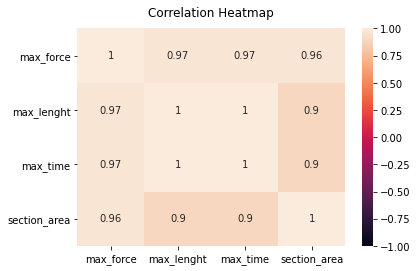

In [8]:
heatmap = sns.heatmap(
    experiment_data.drop('is_valid', axis=1).corr(), 
    vmin=-1,
    vmax=1,
    annot=True
    )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Таким образом можно заметить, что у признаков max_force, max_lenght, max_time очень высокая корреляция. Учитывая принцип работы испытательной машины, а также способ отбора признаков это говорит о правильности проведенной предобработки данных. Наибольший интерес представляет пара признаков max_force/section_area. Замечена высокая корреляция данных признаков, что может говорить о том, что обнаружена явная линейная зависимость данных признаков друг от друга. Для более явного представления распределений полученных признаков, а также их отношения можно воспользоваться диаграммой pairplot, которая строит матрицу графиков, показывающих распределения пар признаков относительно друг друга. На диагонали (самопересечение признаков) при этом строится гистограмма частот. Построить данный график для не номинативных признаков можно следующим образом: 

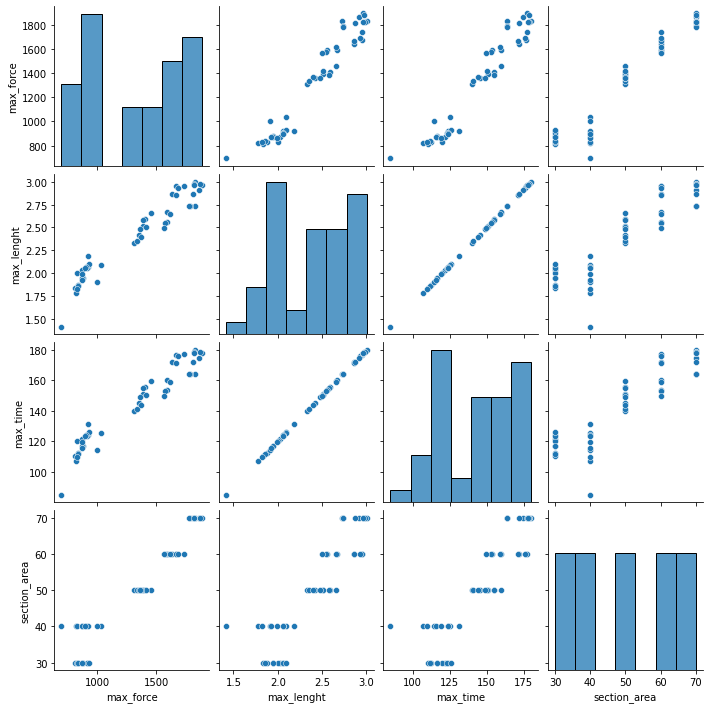

In [9]:
sns.pairplot(experiment_data.drop('is_valid', axis=1));

Также импортированные библиотеки ЯП python позволяют произвести анализ распределений признаков на наличие выбросов. Для каждого значения площади можно построить диаграмму "Ящик с усами" (box-plot). 

Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

Границами ящика служат первый и третий квартили (25-й и 75-й процентили соответственно), линия в середине ящика — медиана (50-й процентиль). Концы усов — края статистически значимой выборки (без выбросов).

Изучим распределение значений параметра max_force в зависимости от значения параметра section_area и выясним, присутствуют ли в данных выборках выбросы. Также выясним насколько отличаются медианные значения и присутствуют ли выбросы в выборках со значением параметра is_valid = True. В случае отсутствия выбросов и схожести данных распределений вся исходная экспериментальная выборка будет использоваться для построения модели машинного обучения. В случае же, если будут обнаружены аномальные значения - выбросы, их необходимо будет исключить из выборки для построения модели.

 Построить диграммы для выбранного значения площади можно следующим способом:

 В данных графиках ящик под цифрой 0 - распределение всех значений параметра при данной площади 
 при цифре 1 - образцов с параметром is_valid = True 

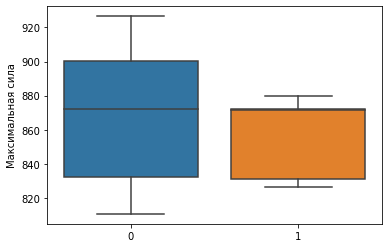

In [10]:
sns.boxplot(data=[
    experiment_data[experiment_data.section_area == 30].max_force,
    experiment_data[(experiment_data.section_area == 30) & (experiment_data.is_valid == True)].max_force],
    ).set(ylabel='Максимальная сила');

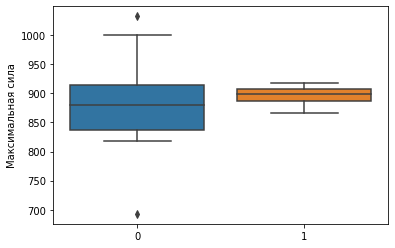

In [11]:
sns.boxplot(data=[
    experiment_data[experiment_data.section_area == 40].max_force,
    experiment_data[(experiment_data.section_area == 40) & (experiment_data.is_valid == True)].max_force],
    ).set(ylabel='Максимальная сила');

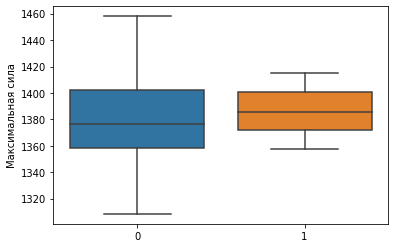

In [12]:
sns.boxplot(data=[
    experiment_data[experiment_data.section_area == 50].max_force,
    experiment_data[(experiment_data.section_area == 50) & (experiment_data.is_valid == True)].max_force],
    ).set(ylabel='Максимальная сила');

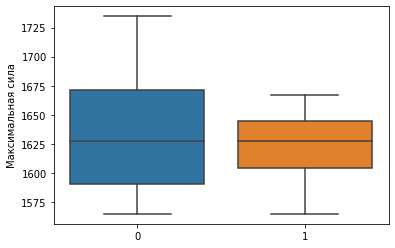

In [13]:
sns.boxplot(data=[
    experiment_data[(experiment_data.section_area == 60)].max_force,
    experiment_data[(experiment_data.section_area == 60) & (experiment_data.is_valid == True)].max_force],
    ).set(ylabel='Максимальная сила');

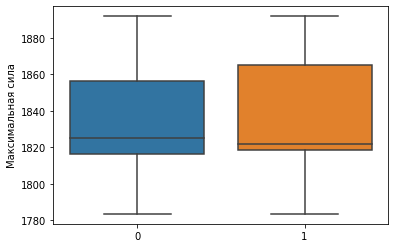

In [14]:
sns.boxplot(data=[
    experiment_data[experiment_data.section_area == 70].max_force,
    experiment_data[(experiment_data.section_area == 70) & (experiment_data.is_valid == True)].max_force],
    ).set(ylabel='Максимальная сила');

Таким образом, при анализе распределений параметра max_force в зависимости от площади поперечного сечения образца и характера его разрыва было обнаружено следующее: 
1) Зачастую, выборка, состоящая из образцов порвавшихся в рабочей зоне, обладает более "сжатым" распределением, то есть размах этой выборки меньше, чем у всей выборки. 
2) Образцы всех сечений, за исключением образцов с сечением 40 $ мм^2 $ не содержат значений, выходящих за пределы интервала $ \pm 1.5 $ межквартильных размаха. В выборке образцов сечением 40 $ мм^2 $ замечено два выброса, соответствующих образцам 4-1 и 4-7. Оба этих образцов порвались вне рабочей зоны, что может быть признаком нарушения технологии изготовления данных образцов. Для построения корректной модели линейной регрессии выбросы необходимо удалить.

In [23]:
experiment_data = experiment_data.drop(['4-1', '4-7'])

Таким образом, теперь выборка по параметру max_force не содержит аномальных значений (выбросов) с точки зрения математической статистики. 
Для построения модели машинного обучения способной предсказывать значения параметра max_force исходя из других известных параметров будет применена линейная регрессия. Линейная регрессия - это используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной y от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) x с линейной функцией зависимости.
В общем виде ответ модели линейной регрессии будет описываться формулой 

$$ y = c_0 + c_1*x_1 + c_2*x_2 + ... + c_n*x_n$$

Где:
* y - целевой признак, значение которого необходимо предсказать 
* $ x_1 ... x_n $ - независимые переменные  
* $ c_1 ... c_n $ - коэффициенты регрессии при независимых членах 
* $ c_0 $ - константа, интерцепт (intercept)

Для реализации классической модели линейной регрессии предполагается, что отсутствует полная коллинеарность факторов, поэтому для построения модели предсказания зависимой переменной max_force будет использоваться исключительно значение признака section_value. 

Таким образом, интерпретация модели линейной регрессии будет заключаться в предсказании максимального значения допустимой нагрузки на образец из печатного пластика по размеру его поперечного сечения. 

Для корректного обучения модели машинного обучения имеющуюся выборку необходимо разделить на две части: тренировочную и тестовую. Модели необходимо обучиться на данных из тренировочной выборки, а качество модели будет проверяться на тестовой выборке. 
В виду того, что варьируемые значения параметра - площадь поперечного сечения, имеет смысл определить в тренировочную выборку - все образцы, кроме образцов какого-то выбранного поперечного сечения. В данном случае было принято решение определить в тестовую выборку все образцы поперечным сечением 70 мм.

In [25]:
train_data = experiment_data.drop(experiment_data[experiment_data.section_area == 70].index)
test_data = experiment_data.drop(experiment_data[experiment_data.section_area != 70].index)

Убедиться в правильности отбора экземпляров можно применив метод, отображающий последние 5 строк таблицы train_data:

In [26]:
train_data.tail()

,max_force,max_lenght,max_time,section_area,is_valid
6-5,1685.746,2.929033,175.74,60,False
6-6,1590.516,2.558533,153.51,60,False
6-7,1576.301,2.544567,152.67,60,False
6-8,1617.316,2.651033,159.06,60,True
6-9,1564.711,2.493233,149.59,60,True


Убедимся, что таблица с данными для теста содержит правильные значения: 

In [27]:
test_data.head()

,max_force,max_lenght,max_time,section_area,is_valid
7-1,1865.088,2.910867,174.65,70,True
7-10,1829.489,3.002200,180.13,70,False
7-2,1815.942,2.866867,172.01,70,False
7-3,1891.834,2.960033,177.60,70,True
7-4,1828.607,2.729533,163.77,70,False


Теперь согласно общепринятому формату необходимо записать значение целевой переменной max_force в переменную y_train, а значение нецелевого признака в переменную X_train. 

In [28]:
y_train = train_data.max_force
X_train = train_data.section_area

Для построения модели линейной регрессии воспользуемся библиотекой statsmodels. Импортируем библиотеку: 

In [29]:
import statsmodels.api as sm 

Для корректного завершения построения модели к целевому признаку необходимо добавить столбец с константой: 

In [30]:
X_train = sm.add_constant(X_train) # adding a constant

Запустим обучение и построение модели линейной регрессии на отобранных признаках: 

In [31]:
regression = sm.OLS(y_train, X_train).fit()

Вывести всю необходимую информацию о полученной модели можно выполнив следующую команду: 

In [33]:
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              max_force   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     324.3
Date:                Thu, 19 Aug 2021   Prob (F-statistic):           1.37e-19
Time:                        10:53:00   Log-Likelihood:                -230.65
No. Observations:                  38   AIC:                             465.3
Df Residuals:                      36   BIC:                             468.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -38.2136     71.367     -0.535      0.596    -182.953     106.526
section_area    27.5319      1.529     18.008      0.000      24.431      30.633
==============================================================================
Omnibus:                        6.031   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.628
Skew:                          -0.941   Prob(JB):                       0.0600
Kurtosis:                       2.898   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Интерпретация полученной модели линейной регрессии 

Обученная модель линейной регрессии при помощи библиотеки statsmodels нуждается в интерпретации. Рассмотрим значимые параметры первой таблицы. 
* Dep. Variable - Depended variable - Зависимая переменная. Целевой признак, который необходимо найти. 
* Model: OLS - Используемая модель машинного обучения - Ordinary Least Squares - Обычный метод наименьших квадратов
* Method: Least Squares - Метод используемый для минимизации ошибки - метод наименьших квадратов 
* Date, Time - дата, время построения модели
* No. Observations: число наблюдений, используемых при построении модели

Следующая таблица описывает расчитанные параметры уравнения линейной регрессии. 
- Const - для значения константы (интерцепта)
- Section_area - для значения параметра Section_area

* Coef - Числовое значение коэффициента $ C_n $ при данной переменной. Таким образом итоговое уравнение линейной регрессии описывается по следующей формуле: 

$$ max Force = -38.2136 + section Area*27.5319 $$

* std.err - standart error - Стандартное отклонение, расчитанное для данного параметра
* t - t-value - t-критерий Стьюдента для распределения данного параметра
* P>|t| - значения p уровня значимости для данного коэффициента регрессии. Если значение < 0.05, то прааметр статистически значимо влияет на зависимую переменную. 
[0.025	0.975] - оба являются измерениями значений наших коэффициентов в пределах 95% наших данных или в пределах двух стандартных отклонений. За пределами этих значений обычно можно считать выбросы.

In [34]:
X_test = test_data.section_area
X_test = sm.add_constant(X_test, has_constant='add')

Воспользуемся функционалом библиотеки для предсказания данных тестовой выборки с помощью полученной модели линейной регрессии. Сделать это можно следующим образом: 

In [42]:
regression.predict(X_test)


7-1     1889.02257
7-10    1889.02257
7-2     1889.02257
7-3     1889.02257
7-4     1889.02257
7-5     1889.02257
7-6     1889.02257
7-7     1889.02257
7-8     1889.02257
7-9     1889.02257
dtype: float64

В виду особенностей модели и предоставленных данных - значения предсказаний совпадают друг с другом. В текущем случае это говорит о корректности работы используемого метода. Для оценки качества полученной модели целесообразно воспользовать одной из следующих метрик качества: $ R^2 $ или Adjusted $ R^2 $

* $ R^2 $ — Коэффициент детерминации — это доля дисперсии зависимой переменной, которая объясняется рассматриваемой моделью зависимости, то есть независимой переменной. Чем ближе коэффициент детерминации к единице на тестовых данных, тем точнее и качественней полученная модель регрессии справляется с задачей предсказания
* Adjusted $ R^2 $ — Скорректированный $ R^2 $ — Используется для сравнения нескольких моделей между собой в случае если число независимых переменных, используемых при их построении не одинаково. 

В нашем случае, таким образом, целесообразо восползоваться обычным $ R^2 $ 

К сожалению, функционал используемой библиотеки не позволяет вычислить коэффициент детерминации для предсказанных значений. Двумя возможными путями дял решения данной задачи является: 

1) реализовать вычисление коэффициента детерминации вручную, воспользовшись известными формулами из математической статистики 
2) подключить стороннюю библиотеку (например sklearn) и воспользоваться готовым решением

Воспользуемся вторым вариантом. Импортируем необходимые функции из библиотеки: 

In [36]:
from sklearn.metrics import r2_score

In [37]:
y_predicted = regression.predict(X_test)
y_true = experiment_data[experiment_data.section_area == 70].max_force


In [38]:
r2_score(y_pred=y_predicted, y_true=y_true)

-2.8359961235587767

Значение коэффициента детерминации, рассчитанное с помощью библиотеки - отрицательное, что не соответствует истине. Полученный результат обусловлен спецификой модели, при которой предсказанных значения, как было указано ранее, одинаковы для каждого образца из тестовой выборки. Обратившись к документации метода узнаем, что: "Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $ R^2 $ score of 0.0.". То есть, для адекватного расчёта значения коэффициента детерминации необходимо включить в тестовую выборку еще как минимум одно значение площади. Используем для этого значения площади 40 мм. В текущей ситуации правильным было бы перестроить модель линейной регрессии так, чтобы тестовые значения не использовались при ее тренировке, однако в условиях небольших объемов тестовых данных это может привести к понижению качества модели.  

In [39]:
X_test_new = experiment_data.drop(experiment_data[(experiment_data.section_area != 70) & (experiment_data.section_area != 40)].index).section_area
X_test_new = sm.add_constant(X_test_new, has_constant='add')

In [40]:
y_predicted_new = regression.predict(X_test_new)
y_true_new = experiment_data[(experiment_data.section_area == 70) | (experiment_data.section_area == 40)].max_force

In [41]:
r2_score(y_pred=y_predicted_new, y_true=y_true_new)

0.9214110575822088

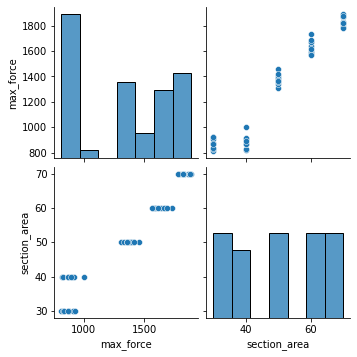

In [46]:
sns.pairplot(experiment_data.drop(['max_lenght', 'max_time', 'is_valid'], axis=1));

Качество предсказаний полученной модели неидеально по нескольким причинам. 
1) Как видно из графика распределение параметра max_force относительно параметра section_area теряет свой линейный характер для образцов поперечным сечением $ 40 мм^2 $. Также помним, что для образцов данного сечения была обнаружена наибольшая дисперсия внутри подвыборки и заметные выбросы. Подобное может быть причиной того, что невозможно достичь 100% повторяемости при изготовлении деталей методом аддитивных технологий, различными деффектами внутренней структуры. 
2) Полученная модель способна предсказывать исключительно значения параметра max_force для образцов выполненных по идентичной технологии, что и испытанные. При построении модели и проведении экспериментов не учитывались такие параметры печатли, как, например: вид пластика, скорость печати, диаметр сопла. В случае увеличения входящих в модель независимых переменных (в разумных пределах) можно получить более сложную, точную и универсальную модель предсказаний. 